In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/Dados_tratados.csv')

### Histograma — Distribuição de Notas

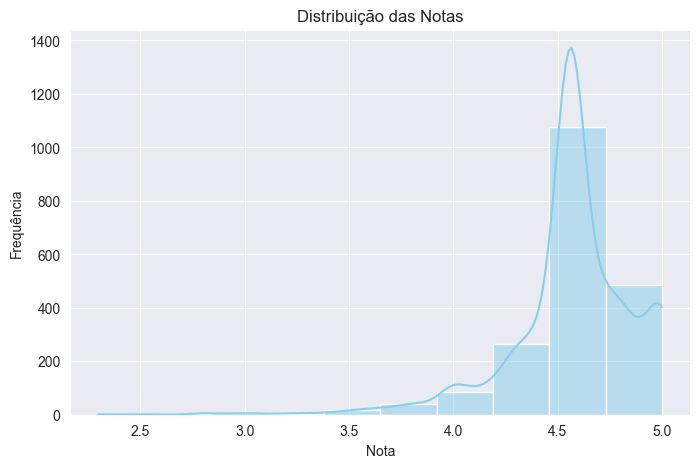

In [21]:

plt.figure(figsize=(8, 5))
sns.histplot(df['Nota'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()


📌 Observações:


### Gráfico de Dispersão — Preço vs Nota


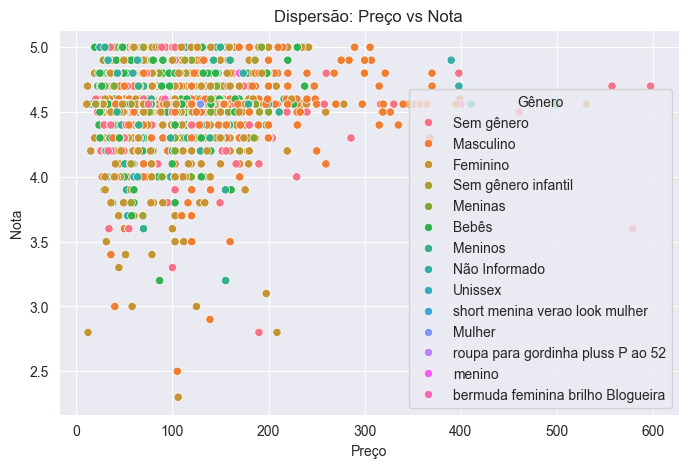

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Preço', y='Nota', data=df, hue='Gênero')
plt.title('Dispersão: Preço vs Nota')
plt.xlabel('Preço')
plt.ylabel('Nota')
plt.legend(title='Gênero')
plt.show()


📌 Observações:
* Pouca ou nenhuma tendência clara entre preço e avaliação.
* A coloração por Gênero é ótima para visualizar subgrupos no comportamento.
*Sugestão:
 * Pode ser interessante aplicar alpha=0.6 nos pontos para melhor visibilidade se houver sobreposição.
 * Usar hue_order se quiser controlar a ordem dos gêneros.



### Mapa de Calor — Correlação entre Variáveis Numéricas

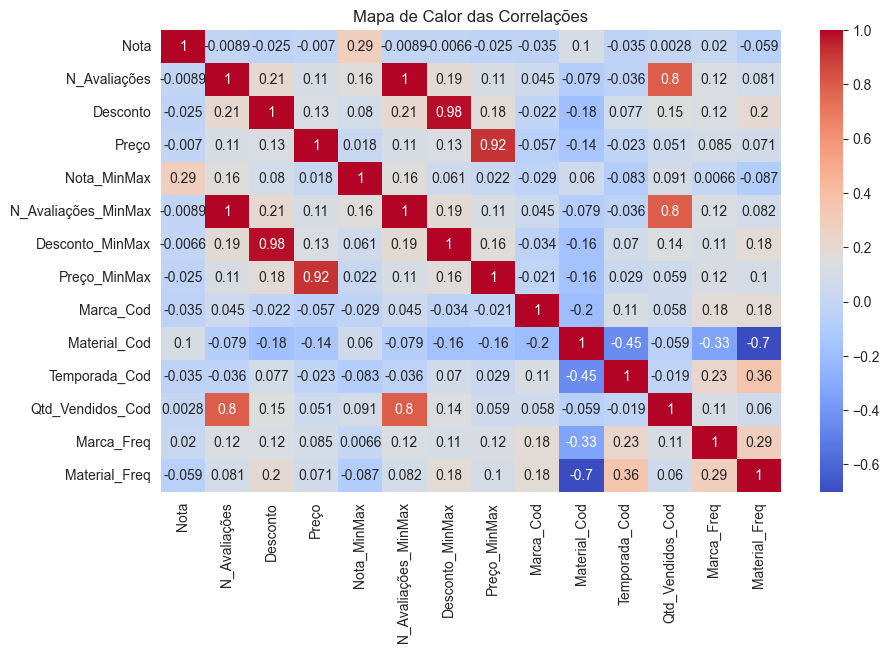

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()


📌 Observações:
* Muito bom uso do annot=True para mostrar os valores exatos das correlações
* Ajuda a identificar relações importantes para análises preditivas ou estratégias de marketing.
* Sugestão:
* Adicionar fmt=".2f" para mostrar apenas duas casas decimais e deixar mais limpo.
 * Pode ordenar as variáveis por hierarquia de correlação se quiser foco em uma métrica (ex: Qtd_Vendidos).

### Gráfico de Barras — Top 10 Marcas por Qtd Vendida

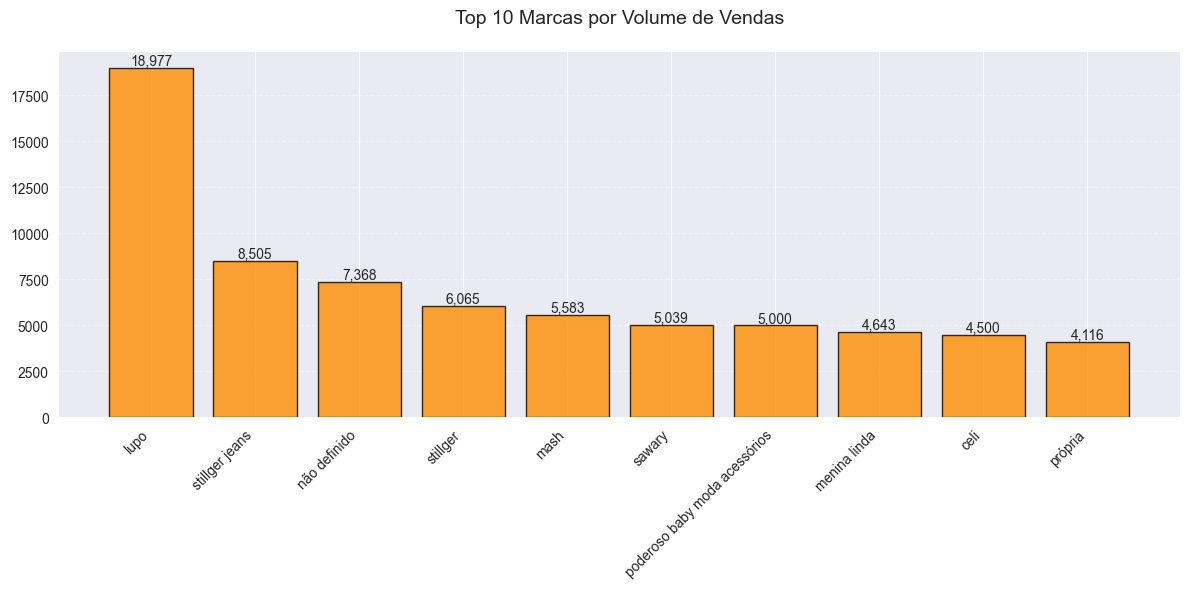

📌 Observações:
* Visualmente direto. Mostra claramente quais marcas lideram em volume.
* Útil para ações comerciais ou de supply chain.
* Sugestão:
* Adicionar rótulos nas barras com os valores (.annotate ou plt.bar_label() no matplotlib)
* Organizar por cor ou branding se for para stakeholders.

### Gráfico de Pizza — Distribuição por Gênero

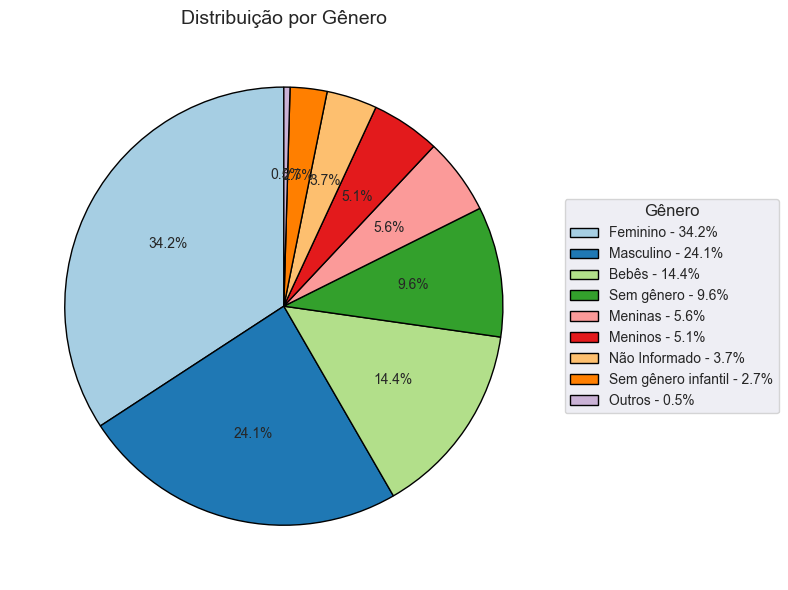

In [45]:
# Contagem por categoria
genero_counts = df['Gênero'].value_counts()

# Agrupar categorias com menos de 2% (opcional)
genero_filtrado = genero_counts[genero_counts / genero_counts.sum() > 0.02]
outros = genero_counts[genero_counts / genero_counts.sum() <= 0.02].sum()
if outros > 0:
    genero_filtrado['Outros'] = outros

# Calcular porcentagens
total = genero_filtrado.sum()
porcentagens = (genero_filtrado / total * 100).round(1)

# Montar rótulos personalizados: "Categoria - XX.X%"
labels_formatadas = [f"{cat} - {porc}%" for cat, porc in zip(genero_filtrado.index, porcentagens)]

# Definir cores (ou usar paleta automática)
cores = plt.cm.Paired.colors[:len(genero_filtrado)]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    genero_filtrado,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'black'}
)

# Legenda com porcentagens
ax.legend(
    wedges,
    labels_formatadas,
    title="Gênero",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=12
)

plt.title('Distribuição por Gênero', fontsize=14)
plt.tight_layout()
plt.show()

📌 Observações:

### Gráfico de Densidade — Preço dos Produtos

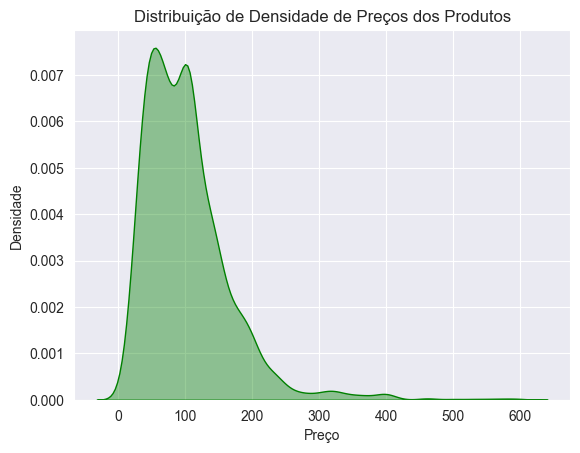

In [46]:
# New version (v0.14.0+ compatible)
sns.kdeplot(
    data=df,
    x='Preço',
    fill=True,  # Replaces shade=True
    color='green',
    alpha=0.4  # Controls transparency (optional)
)

plt.title('Distribuição de Densidade de Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.show()


📌 Observações:

### Gráfico de Regressão — Qtd Vendidos vs Preço

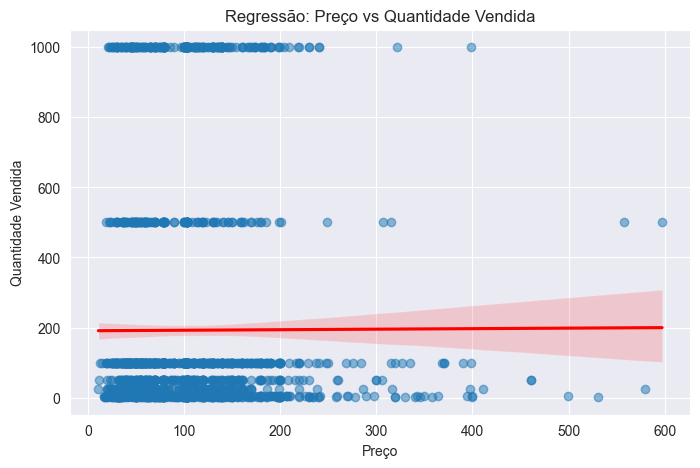

In [47]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Preço', y='Qtd_Vendidos', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regressão: Preço vs Quantidade Vendida')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.show()


📌 Observações:
